# Titanic - Projeto Final

## Introdução

   O RMS Titanic foi um luxuoso transatlântico que afundou após colidir com um iceberg no Oceano Atlântico. O navio partiu em sua viagem inaugural de Southampton para Nova Iorque no dia 10 de abril de 1912, no caminho realizou paradas em Cherbourg-Octeville na França e em Queenstown na Irlanda. Ele colidiu com um iceberg às 23:40min do dia 14 de abril e afundou na madrugada do dia 15, dos 2.224 passageiros a bordo, mais de 1500 pessoas morreram afogadas ou por conta do frio. Desta forma, ficou conhecido como um dos piores desastres marítimos da história.

O conjunto de dados a ser estudado possui informações acerca dos passageiros a bordo do RMS Titanic. Os atributos que compõem esses dados são:

- "Passenger ID" (Identidade do passageiro);
- "Survived" (atributo que identifica se o passageiro sobreviveu ou não ao acidente, se o argumento for igual a '1' o tripulante sobreviveu, já se o valor for igual a '0' o passageiro morreu no incidente);
- "Pclass" (atributo que identifica a classe do passageiro, 1st = primeira classe, 2nd = segunda classe, 3rd = terceira classe);
- "Name" (nome do passageiro);
- "Sex" (sexo do tripulante, male = masculino e female = feminino);
- "Age" (idade do passageiro);
- "SibSp" é o número de irmãos / cônjuges a bordo do Titanic, esse atributo define relações familiares dessa maneira: "Sibling" = irmão, irmã, meio-irmão, irmã adotiva. "Spouse" = marido, esposa (amantes e noivas foram ignorados);
- "Parch" é o número de pais / filhos a bordo do Titanic, esse atributo define relações familiares dessa maneira: "Parent" = mãe, pai;. "Child" = filha, filho, enteada, enteado. Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas;
- "Ticket" é o número do bilhete de embarque;
- "Fare" é a tarifa de passageiro;
- "Cabin" é o número da cabine;
- "Embarked" é o porto que o passageiro embarcou (porto de embarque, C = Cherbourg, Q = Queenstown, S = Southampton).
 
Essas informações são fornecidas pela Kaggle, pelo Wikipedia e pelo History. Um estudo minucioso com esses dados será realizado, afim de investigar perguntas relevantes ao incidente do RMS Titanic, desta forma alcançando conclusões.

In [1]:
# Os imports, que vamos usar para realizarmos as análises 
# também pode-se usar outras bibliotecas se desejar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Abra o arquivo CSV e mostre algumas linhas
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas

Foram elaboradas 5 perguntas a serem estudadas nesse documento:

- Qual a idade média das pessoas que obtiveram sucesso em sobreviver ao acidente?
Essa pergunta será útil para identificar a faixa etária média das pessoas que sobreviveram ao acidente.
- As pessoas de qual sexo obtiveram mais sucesso em sobreviver ao incidente?
Essa pergunta ajudará a identificar qual o gênero que teve a maior taxa de sobrevivência.
- As pessoas de qual classe obtiveram mais sucesso em sobreviver ao acidente?
Essa pergunta identificará a classe que teve mais sobreviventes no incidente.
- Quantos passageiros possuiam parentes relativos que embarcaram no Titanic e quantos desses passageiros sobreviveram?
Poderemos visualizar quantos parentes relativos sobreviveram, para assim dizer se uma pessoa perdeu familiares no incidente.
- Que atributos estão associados a uma maior taxa de sobrevivência?
Identificaremos os atributos que influenciaram na sobrevivência dos passageiros do RMS Titanic.


## Limpeza dos dados

Eliminaremos as colunas "Embarked", "Ticket", "Fare" e "Cabin" pois não serão necessários para responder as perguntas, sendo desta forma dados dispensaveis na nossa análise, pois não retornaram nenhuma informação relevante e devido a alguns desses estarem incompletos.

## Descartando colunas irrelevantes

In [3]:
# Realizamos a limpeza dos dados aqui
# descartamos colunas do conjunto de dados de 'titanic-data-6.csv'
df_titanic.drop(['Embarked', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
 
# visualizamos as mudanças, para confirmarmos as alterações.
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0


 ## Dados duplicados
 
 Vamos verificar o número de dados duplicados com duplicated()

In [4]:
# exiba o número de duplicatas nos conjunto de dados do Titanic
print("Dados duplicados em titanic: {0}".format(df_titanic.duplicated().sum()))

Dados duplicados em titanic: 0


## Dados Faltantes

Vamos verificar as colunas que têm valores ausentes com info(), e depois vamos contar quantos valores faltam em cada atributo com isnull().sum()

In [5]:
# exibe as colunas com valores ausentes
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [6]:
# exiba a contagem de valores faltantes para cada atributo em titanic
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

Visualizamos que a coluna 'Age' possui valores incompletos, poderiamos eliminar essas linhas com dados faltantes, entretanto para investigarmos esse dado nós vamos simplesmente desconsiderar os registros nulos. Das 891 pessoas, 177 (aproximadamente 20%) estão com idades não preenchidas. 

Vamos juntar as colunas 'SibSp' com a coluna 'Parch', desta forma vamos ter todos os parentes relativos do passageiro na coluna 'Relatives' isso facilitará a nossa análise para a quarta pergunta que investigaremos.

In [7]:
# cria a nova coluna 'Relatives' juntando os dados das colunas 'SibSp' e 'Parch'
df_titanic['Relatives'] = df_titanic['SibSp'] + df_titanic['Parch']
df_titanic.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Relatives
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,0


## Salvando os dados 

Agora vamos salvar o progresso para a próxima etapa, o que nos fará poupar tempo e trabalho, em vez de toda vez termos de realizar a limpeza ao abrir o notebook.


In [8]:
# salva os novos conjuntos de dados para a próxima seção
df_titanic.to_csv('titanic_clean.csv', index=False)

Vamos criar um outro dataframe que utilizaremos para a quarta pergunta.

In [9]:
# exibimos as primeiras linhas da coluna 'Pclass'
df_parents = df_titanic.iloc[:, np.r_[0:2, 6:9]]
df_parents.head()

,PassengerId,Survived,SibSp,Parch,Relatives
0,1,0,1,0,1
1,2,1,1,0,1
2,3,1,0,0,0
3,4,1,1,0,1
4,5,0,0,0,0


In [10]:
# salva os novos conjuntos de dados para utilizarmos nesse tópico.
df_parents.to_csv('parents_clean.csv', index=False)

## Análise 

Iremos agora com a utilização de informações visuais responder as perguntas elaboradas anteriormente.

In [11]:
# abre o novo conjunto de dados que foi criado após realizarmos a limpeza dos dados
df_titanic = pd.read_csv('titanic_clean.csv')

### P1: Qual a idade média das pessoas que obtiveram sucesso em sobreviver ao acidente?

Vamos realizar uma exploração nos dados com relação a idade.

Primeiramente vamos ver quantos passageiros sobreviveram dos 891 passageiros a bordo.

In [12]:
# Saída da contagem de passageiros que sobreviveram e os que não sobreviveram ao acidente.
print('Sobreviveram: ', df_titanic['Survived'].value_counts()[1])
print('Não sobreviveram: ', df_titanic['Survived'].value_counts()[0])

Sobreviveram:  342
Não sobreviveram:  549


Vamos criar uma visualização agora do tipo "torta", onde ficará claro a visualização das pessoas que sobreviveram e as que não conseguiram. 

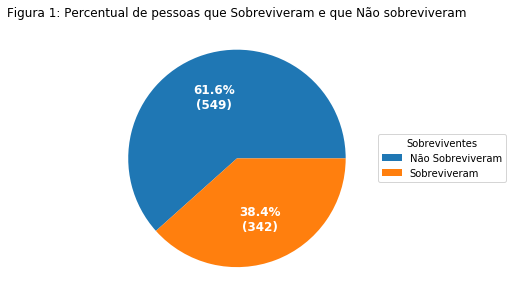

In [13]:
#Gera um gráfico 'pie' do percentual de pessoas que sobreviveram e que não sobreviveram ao acidente do Titanic.
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

survivors = ["Não Sobreviveram", "Sobreviveram"]

def func(pct, allvals):
    # """
    # Função
    # INPUT:
    # pct: 
    # allvals: Valores a serem transformados em porcentagem.
    # OUTPUT:
    # Valores em forma de porcentagem e em forma absoluta.
    # """
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(df_titanic['Survived'].value_counts(), autopct=lambda pct: func(pct, df_titanic['Survived'].value_counts()),
                                  textprops=dict(color="w"))

ax.legend(wedges, survivors, title="Sobreviventes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Figura 1: Percentual de pessoas que Sobreviveram e que Não sobreviveram")

plt.show()

Dos 891 passageiros do RMS Titanic apenas 38,4% deles conseguiram sobreviver.

In [14]:
# Vamos visualizar rapidamente estatísticas descritivas úteis para utilizarmos nessa pergunta.
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Relatives
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,10.000000


 Agora vamos, ver a faixa etária dos passageiros para depois descobrirmos a faixa etária que teve o maior indice de sobrevivência.

<Figure size 432x288 with 0 Axes>

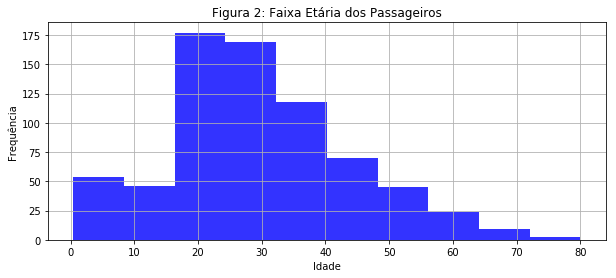

In [15]:
# Gera histograma de frequencia de idade
plt.figure();
df_titanic.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Figura 2: Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Podemos ver que a maioria da tripulação está entre a faixa etária de 16 a 33 anos aproximadamente.

In [16]:
# Vamos visualizar o índice e rótulo de cada coluna do df_titanic
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 PassengerId
1 Survived
2 Pclass
3 Name
4 Sex
5 Age
6 SibSp
7 Parch
8 Relatives


Na célula abaixo nós podemos identificar as faixas etárias que tiveram uma taxa de sobrevivência maior que as outras, vamos considerar que as idades que tiveram um valor superior a 0,5 tiveram uma taxa de sobrevivência alta, já as idades com valor inferir a 0,5 tiveram uma taxa de sobrevivência baixa.

In [17]:
# obtemos as proporções de sobrevivência para algumas idades.
df_titanic.groupby(['Age']).mean()['Survived']

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

In [18]:
# Vamos visualizar rapidamente estatísticas descritivas úteis para utilizarmos nessa pergunta.
df_titanic.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Vamos agora criar uma visualização onde facilitará a nossa análise desses dados.
Utilizei esses links para fazer o Histograma de sobreviventes por idade:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

<Figure size 432x288 with 0 Axes>

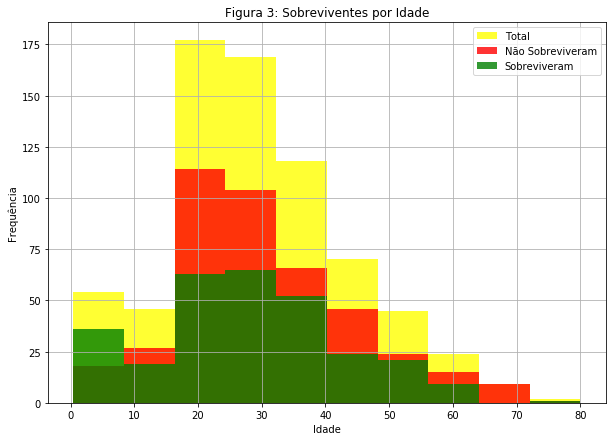

In [19]:
# Gera histograma de sobreviventes por idade
histage_df = pd.DataFrame({'Total': df_titanic['Age'], 'Não Sobreviveram': df_titanic[df_titanic['Survived']==0]['Age'], 'Sobreviveram': df_titanic[df_titanic['Survived']==1]['Age']})
 
plt.figure();

columns=['Total', 'Não Sobreviveram', 'Sobreviveram']
histage_df.plot.hist(color=('yellow', 'red', 'green'), alpha=0.8, bins=10, figsize=(10,7))
plt.title('Figura 3: Sobreviventes por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.grid()

plt.show()



Ao analisarmos o gráfico acima, podemos ver que a faixa etária que teve o maior indice de sobrevivencia foram as crianças (de 0 a 10 anos). A faixa etária com mais baixas foi dos 16 até 30 anos.

### P2: As pessoas de qual sexo obtiveram mais sucesso em sobreviver ao incidente?

Vamos realizar uma exploração nos dados com relação ao sexo agora.

In [20]:
# exibimos as primeiras linhas da coluna 'Sex'
df_titanic['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [21]:
# Conseguimos contar dessa forma quantas vezes aparece a strings 'female' e 'male' na coluna 'Sex'.
df_titanic.groupby(['Sex'])['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [22]:
# Saída de quantos homens e mulheres estavam abordo.
print('Mulheres a bordo: ', df_titanic['Sex'].value_counts()[1])
print('Homens a bordo: ', df_titanic['Sex'].value_counts()[0])

Mulheres a bordo:  314
Homens a bordo:  577


Com o groupby acima nós conseguimos ver que a maioria dos passageiros era do sexo masculino, vamos criar uma visualização do tipo "pie" agora.

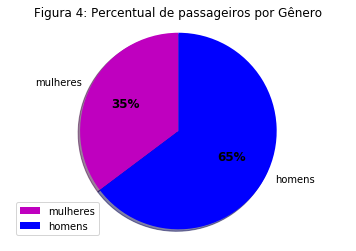

In [23]:
# Gera um gráfico 'pie' do percentual de passageiros por Gênero ab
homens = [df_titanic['Sex'].value_counts()[1]]
mulheres = [df_titanic['Sex'].value_counts()[0]]
slices = [homens, mulheres]
genders = ['mulheres', 'homens']
cols = ['m', 'b']

wedges, texts, autotexts = plt.pie(slices, labels=genders, colors=cols, startangle=90, shadow= True, autopct='%1.0f%%')


plt.axis('equal')
plt.setp(autotexts, size=12, weight="bold")
plt.title('Figura 4: Percentual de passageiros por Gênero')
plt.legend(genders, loc='best')
plt.show()

A maioria das pessoas abordo do Titanic, eram homens com um total de 577 (65%).


Agora vamos, descobrir qual gênero teve o maior indice de sobrevivência, vamos utilizar um gráfico de barras para isso.

In [24]:
# obtemos as contagens para cada gênero e status de sobrevivência.
survivalsex_counts = df_titanic.groupby(['Sex', 'Survived']).count()['PassengerId']
print(survivalsex_counts)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


Com o groupby acima nós conseguimos ver quantos passageiros de cada sexo sobreviveram e os que morreram, agora vamos criar uma visualização na forma de um gráfico barra.

In [25]:
# obtenha a contagem total dos tripulantes do sexo feminino e masculino.
genders_totals = df_titanic.groupby(['Sex']).count()['PassengerId']
print(genders_totals)

Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [26]:
# obtenha as proporções dividindo as contagens de sobrevivência do gênero feminino pelo número total de tripulantes do sexo feminino.
female_proportions = survivalsex_counts['female'] / genders_totals['female']
print(female_proportions)

Survived
0    0.257962
1    0.742038
Name: PassengerId, dtype: float64


In [27]:
# obtenha as proporções dividindo as contagens de sobrevivência do gênero masculino pelo número total de tripulantes do sexo masculino.
male_proportions = survivalsex_counts['male'] / genders_totals['male']
print(male_proportions)

Survived
0    0.811092
1    0.188908
Name: PassengerId, dtype: float64


Vamos traçar as proporções um gráfico de barras agora.

Precisamos definir a localização no eixo x para cada grupo e a largura de cada barra.

In [28]:
ind = np.arange(len(female_proportions))  # a localização no eixo x dos grupos
width = 0.35       # a largura das barras

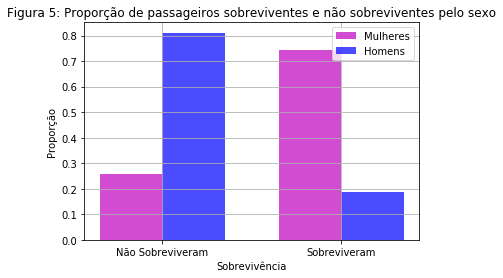

In [29]:
# trace as barras
female_bars = plt.bar(ind, female_proportions, width, color='m', alpha=.7, label='Mulheres')
male_bars = plt.bar(ind + width, male_proportions, width, color='b', alpha=.7, label='Homens')

# título e rótulos
plt.ylabel('Proporção')
plt.xlabel('Sobrevivência')
plt.title('Figura 5: Proporção de passageiros sobreviventes e não sobreviventes pelo sexo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ['Não Sobreviveram', 'Sobreviveram']  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.grid()
plt.legend(loc='best')
plt.show()


Através do gráfico acima, podemos ver que menos de 20% dos homens sobreviveram e mais de 70% das mulheres sobreviveram.

### P3: As pessoas de qual classe obtiveram mais sucesso em sobreviver ao acidente?

Vamos realizar uma exploração nos dados com relação a classe agora.

In [30]:
# exibimos as primeiras linhas da coluna 'Pclass'
df_titanic['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [31]:
# Vamos visualizar rapidamente estatísticas descritivas úteis para utilizarmos nessa pergunta.
df_titanic['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [32]:
# Conseguimos contar dessa forma quantos passageiros pertenciam em cada classe na coluna 'Pclass'.
df_titanic.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [33]:
# Saída de passageiros na primeira, segunda e terceira classe.
print('Passageiros na primeira classe: ', df_titanic['Pclass'].value_counts()[1])
print('Passageiros na segunda classe: ', df_titanic['Pclass'].value_counts()[2])
print('Passageiros na terceira classe: ', df_titanic['Pclass'].value_counts()[3])

Passageiros na primeira classe:  216
Passageiros na segunda classe:  184
Passageiros na terceira classe:  491


Com o groupby acima nós conseguimos ver que a maioria dos passageiros eram da terceira classe, vamos criar uma visualização do tipo "pie" agora, para facilitar a visualização da distribuição dos tripulantes por classe no RMS Titanic.

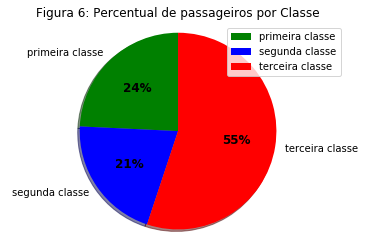

In [34]:
# Gera um gráfico 'pie' do percentual de passageiros por Classe abordo do Titanic
first_class = [df_titanic['Pclass'].value_counts()[1]]
second_class = [df_titanic['Pclass'].value_counts()[2]]
third_class = [df_titanic['Pclass'].value_counts()[3]]

slices = [first_class, second_class, third_class]
classes = ['primeira classe', 'segunda classe', 'terceira classe']
cols = ['g', 'b', 'r']

wedges, texts, autotexts = plt.pie(slices, labels=classes, colors=cols, startangle=90, shadow= True, autopct='%1.0f%%')


plt.axis('equal')
plt.setp(autotexts, size=12, weight="bold")
plt.title('Figura 6: Percentual de passageiros por Classe')
plt.legend(classes, loc='best')
plt.show()

Agora vamos, descobrir qual classe teve o maior indice de sobrevivência, vamos utilizar um gráfico de barras para isso.

In [35]:
# obtemos as contagens para cada classe e status de sobrevivência
survivalclass_counts = df_titanic.groupby(['Pclass', 'Survived']).count()['PassengerId']
print(survivalclass_counts)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


Com o groupby acima nós conseguimos ver quantos passageiros de cada classe sobreviveram e os que morreram, agora vamos criar uma visualização na forma de um gráfico barra.

In [36]:
# obtenha a contagem total dos tripulantes de cada classe.
class_totals = df_titanic.groupby(['Pclass']).count()['PassengerId']
print(class_totals)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


In [37]:
# obtenha as proporções dividindo as contagens de sobrevivência da primeira classe pelo número total de tripulantes da primeira classe.
firstclass_proportions = survivalclass_counts[1] / class_totals[1]
print(firstclass_proportions)

Survived
0    0.37037
1    0.62963
Name: PassengerId, dtype: float64


In [38]:
# obtenha as proporções dividindo as contagens de sobrevivência da segunda classe pelo número total de tripulantes da segunda classe.
secondclass_proportions = survivalclass_counts[2] / class_totals[2]
print(secondclass_proportions)

Survived
0    0.527174
1    0.472826
Name: PassengerId, dtype: float64


In [39]:
# obtenha as proporções dividindo as contagens de sobrevivência da terceira classe pelo número total de tripulantes da terceira classe.
thirdclass_proportions = survivalclass_counts[3] / class_totals[3]
print(thirdclass_proportions)

Survived
0    0.757637
1    0.242363
Name: PassengerId, dtype: float64


Vamos traçar as proporções um gráfico de barras agora.

Precisamos definir a localização no eixo x para cada grupo e a largura de cada barra.

In [40]:
ind = np.arange(len(thirdclass_proportions))  # a localização no eixo x dos grupos
width = 0.3       # a largura das barras

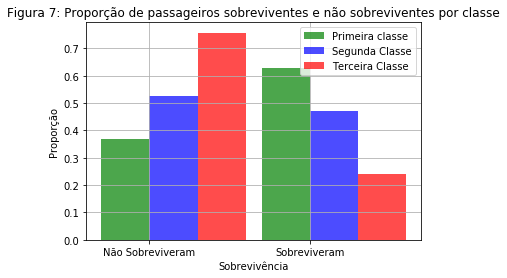

In [41]:
# trace as barras
firstclass_bars = plt.bar(ind, firstclass_proportions, width, color='g', alpha=.7, label='Primeira classe')
secondclass_bars = plt.bar(ind + width, secondclass_proportions, width, color='b', alpha=.7, label='Segunda Classe')
thirdclass_bars = plt.bar(ind + 2 * width, thirdclass_proportions, width, color='r', alpha=.7, label='Terceira Classe')

# título e rótulos
plt.ylabel('Proporção')
plt.xlabel('Sobrevivência')
plt.title('Figura 7: Proporção de passageiros sobreviventes e não sobreviventes por classe')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ['Não Sobreviveram', 'Sobreviveram']  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.grid()
plt.legend(loc='best')
plt.show()


Através do gráfico acima, podemos ver que menos de 30% dos passageiros da terceira classe sobreviveram foi a classe com o menor indice de sobrevivência. Além disso, a podemos ver que mais de 60% dos tripulantes da primeira classe sobreviveram, esta foi a classe com o maior índice de sobrevivência. Por fim, vemos que menos de 50% dos passageiros da segunda classe sobreviveram ao indicente do RMS Titanic.

### P4: Quantos passageiros possuiam parentes relativos que embarcaram no Titanic e quantos desses passageiros sobreviveram?

Vamos realizar uma exploração nos dados com relação a relações familiares agora.

Vamos trabalhar com um novo data_frame para essa parte.

In [42]:
# abre o conjunto de dados que foi criado anteriormente quando realizavamos a limpeza dos dados
df_parents = pd.read_csv('parents_clean.csv')

In [43]:
# exibimos as primeiras linhas do novo dataframe
df_parents.head()

,PassengerId,Survived,SibSp,Parch,Relatives
0,1,0,1,0,1
1,2,1,1,0,1
2,3,1,0,0,0
3,4,1,1,0,1
4,5,0,0,0,0


In [44]:
# Vamos visualizar rapidamente estatísticas descritivas úteis para utilizarmos nessa pergunta.
df_parents.describe()

,PassengerId,Survived,SibSp,Parch,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.523008,0.381594,0.904602
std,257.353842,0.486592,1.102743,0.806057,1.613459
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,8.000000,6.000000,10.000000


In [45]:
# Saída dos totais de 'SibSp', 'Parch' e 'Relatives'.
print('Número de irmãos e/ou cônjuges abordo: ', df_parents['SibSp'].sum())
print('Número de pais e/ou filhos a bordo: ', df_parents['Parch'].sum())
print('Número de parentes relativos a bordo: ', df_parents['Relatives'].sum())

Número de irmãos e/ou cônjuges abordo:  466
Número de pais e/ou filhos a bordo:  340
Número de parentes relativos a bordo:  806


In [46]:
# Conseguimos contar dessa forma quantos passageiros possuiam irmãos e/ou cônjuges abordo.  
df_parents.groupby(['SibSp'])['PassengerId'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

Podemos ver quantos passageiros tinham irmãos e/ou cônjuges abordo de forma especifica, por exemplo 209 passageiros tinham pelo menos 1 irmão ou cônjuge abordo.

In [47]:
# Conseguimos contar dessa forma quantos passageiros possuiam pais e/ou filhos abordo.  
df_parents.groupby(['Parch'])['PassengerId'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64

Podemos ver quantos passageiros tinham pais e/ou filhos abordo de forma especifica, por exemplo 118 passageiros tinham pelo menos 1 pai ou filho abordo.

In [48]:
# Conseguimos contar dessa forma quantos passageiros possuiam parentes relativos abordo.  
df_parents.groupby(['Relatives'])['PassengerId'].count()

Relatives
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: PassengerId, dtype: int64

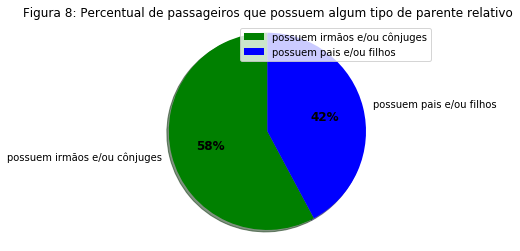

In [49]:
# Gera um gráfico 'pie' do percentual de passageiros que possuem parentes relativos abordo do Titanic
sibsp_relations = [df_parents['SibSp'].sum()]
parch_relations = [df_parents['Parch'].sum()]

slices = [sibsp_relations, parch_relations]
relations = ['possuem irmãos e/ou cônjuges', 'possuem pais e/ou filhos']
cols = ['g', 'b', 'r']

wedges, texts, autotexts = plt.pie(slices, labels=relations, colors=cols, startangle=90, shadow= True, autopct='%1.0f%%')


plt.axis('equal')
plt.setp(autotexts, size=12, weight="bold")
plt.title('Figura 8: Percentual de passageiros que possuem algum tipo de parente relativo')
plt.legend(relations, loc='best')
plt.show()

É importante ressaltar que os passageiros podem ter tanto irmãos e/ou cônjuges quanto pais e/ou filhos abordo.

Agora vamos descobrir quantos desses sobreviveram, vamos utilizar um gráfico histograma para isso.

In [50]:
# obtemos as contagens para cada pessoa que possuia um parente abordo e o status de sobrevivência
survivalrelatives_counts = df_parents.groupby(['Relatives', 'Survived']).count()['PassengerId']
print(survivalrelatives_counts)

Relatives  Survived
0          0           374
           1           163
1          0            72
           1            89
2          0            43
           1            59
3          0             8
           1            21
4          0            12
           1             3
5          0            19
           1             3
6          0             8
           1             4
7          0             6
10         0             7
Name: PassengerId, dtype: int64


Com o groupby acima nós conseguimos ver quantos passageiros que possuiam parentes sobreviveram e os que morreram, agora vamos criar uma visualização na forma de um histograma.

In [51]:
# obtenha a contagem total dos tripulantes de cada classe.
relatives_totals = df_parents.groupby(['Relatives']).count()['PassengerId']
print(relatives_totals)

Relatives
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: PassengerId, dtype: int64


<Figure size 432x288 with 0 Axes>

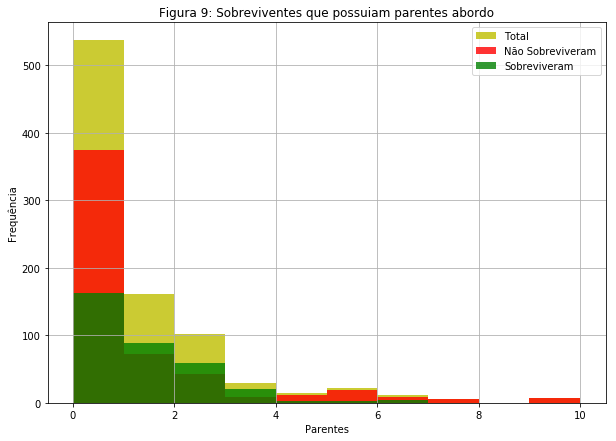

In [52]:
# Gera histograma de sobreviventes que possuiam parentes abordo
histrelatives_df = pd.DataFrame({'Total': df_parents['Relatives'], 'Não Sobreviveram': df_parents[df_parents['Survived']==0]['Relatives'], 'Sobreviveram': df_parents[df_parents['Survived']==1]['Relatives']})
 
plt.figure();

columns=['Total', 'Não Sobreviveram', 'Sobreviveram']
histrelatives_df.plot.hist(color=('y', 'r', 'g'), alpha=0.8, bins=10, figsize=(10,7))
plt.title('Figura 9: Sobreviventes que possuiam parentes abordo')
plt.xlabel('Parentes')
plt.ylabel('Frequência')

plt.grid()

plt.show()


No gráfico acima vemos que os passageiros que participavam do intervalo de 1 parente relativo até 3 parentes tiveram o maior indice de sobreviência. Já as outras pessoas tiveram um índice de sobrevivência muito baixo.

## Conclusão

Através da análise feita buscamos descobrir que atributos estavam associados a uma maior taxa de sobrevivência. Nós identificamos os atributos que influenciaram na sobrevivência dos passageiros do RMS Titanic. Atributos como a idade, o sexo, a classe e o fato do passageiro ter parentes abordo.

Por meio do estudo dos dados da idade, foi possível identificar que a faixa etária que teve o maior indice de sobrevivencia foram as crianças (de 0 a 10 anos), e a faixa etária com mais baixas foi dos jovens adultos de (16 até 30 anos), um dos problemas encontrados ao realizar esse estudo foram os dados incompletos da idade de alguns passageiros, desta forma a análise não foi 100 % completa, foi realizado uma análise parcial dos dados que possuíamos na coluna 'Age'.

Além disso, foi realizado um estudo levando em conta o gênero dos passageiros, visualizamos que mais da metade dos passageiros era composta por homens, sendo que apenas 20% dos mesmos sobreviveram e mais de 70% das mulheres sobreviveram.

Em outro estudo realizado nós constatamos, os passageiros tiveram o menor indice de sobrevivência, e os da primeira classe tiveram o maior índice de sobrevivência.

Por fim, vimos que os passageiros que não possuíam parentes relativos foram os que tiveram mais baixas em relação a aqueles que tinham entre 1 a 3 parentes abordo.

Este estudo ele não é definitivo, e pode ser continuado com a análise de outras variáveis, é possivel explorar e encontrar novos insights interessantes, analisando outros dados ou os mesmos ainda buscando relacionar-los.

## Bibliografia

Escreva os links que vocês usaram para escrever esse projeto.

https://seuhistory.com/hoje-na-historia/inicia-se-tragedia-do-titanic

https://pt.wikipedia.org/wiki/RMS_Titanic

https://www.kaggle.com/c/titanic/data

https://matplotlib.org/gallery/index.html

https://matplotlib.org/tutorials/index.html

http://pandas.pydata.org/pandas-docs/stable/

https://medium.com/marciojesus/investigando-o-naufrágio-do-titanic-b478c7750d31

https://docs.scipy.org/doc/numpy-1.16.1/reference/

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

https://stackoverflow.com/